# Sampling methods: Box-Mueller 

## Exercise: generating samples from a Gaussian distribution 

#### 07/22, written by Alice Cicirello (alicecicirello8@gmail.com) 



Generate 3000 samples (consider  $2 \leq x \leq 8$ and 100 bins) from the pdf of a Gaussian Distribution 
$$
 p(z) = N(z,\mu,\sigma)=N(\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)
$$
with $\mu=5$ and $\sigma=0.5$ - use the Box-Mueller algorithm

Compare it with:
- continuos pdf of the Gaussian Distribution 
- random samples generated with numpy.random.normal:      https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

## Solution

### Step 1: Generating 3000 samples with Box-Mueller

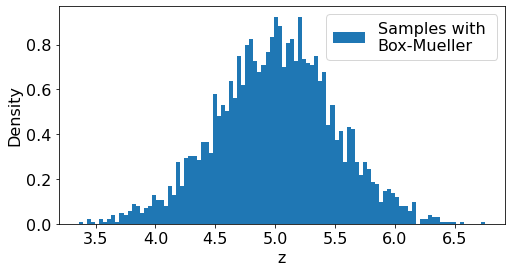

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

size = 3000  # adjust size if needed
U1 = np.random.uniform(size=size) # generate 3000 samples from uniform distribution
U2 = np.random.uniform(size=size) # generate 3000 samples from another uniform distribution

r = np.sqrt(-2 * np.log(U1))      # position vector in polar coordinate - inverse CDF of the exponential distribution   
Theta = 2 * np.pi * U2            # scale from 0 to 1, to 0 to 360 (2*\pi)

x = r * np.cos(Theta)             # Sample of the random variable X - N(0,1)  
y = r * np.sin(Theta)             # Sample of the random variable Y - N(0,1)  - variable to be discarded

# discsarding one variable and building samples from N(5,0.5)
mean=5;                           # mean
std=0.5;                          # standard deviation

z= x * std + mean;                # samples of z variable 

plt.figure(figsize=(8, 4))
plt.hist(z,density=True, bins=100, label='Samples with \nBox-Mueller');
plt.xlabel('z')
plt.ylabel('Density')
plt.legend()
plt.show()

### Step 2: define the continuos pdf 

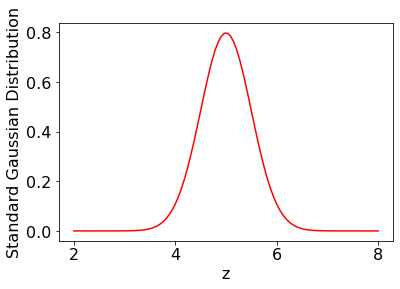

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

variance = np.square(std)


z2 = np.linspace(2, 8, 100)   
f = np.exp(-np.square(z2-mean)/(2*variance))/(np.sqrt(2*np.pi*variance))

plt.plot(z2,f, color='red')
plt.ylabel('Standard Gaussian Distribution')
plt.xlabel('z')
plt.show()

### Step 3: Compare pdf with Box-Mueller

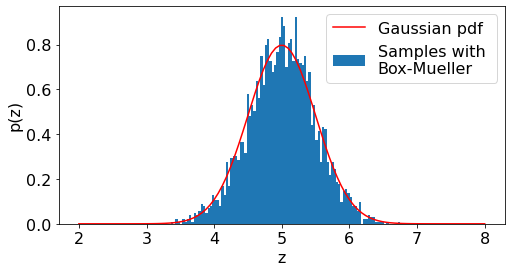

In [3]:
plt.figure(figsize=(8, 4))
plt.hist(z,density=True, bins=100, label='Samples with \nBox-Mueller');
plt.plot(z2,f, color='red', label='Gaussian pdf')
plt.xlabel('z')
plt.ylabel('p(z)')
plt.legend()
plt.show()

### Step 4: Samples generated with numpy

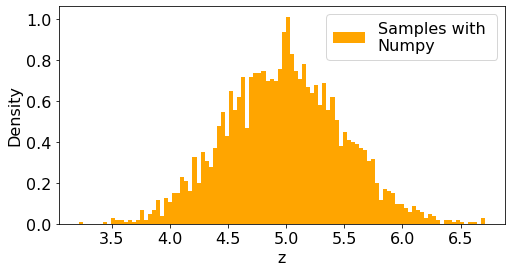

In [4]:
s = np.random.normal(mean, std, size)   # generating samples with numpy

plt.figure(figsize=(8, 4))
plt.hist(s,density=True, bins=100, color='orange', label='Samples with \nNumpy');
plt.xlabel('z')
plt.ylabel('Density')
plt.legend()
plt.show()

### Step 5: Compare all

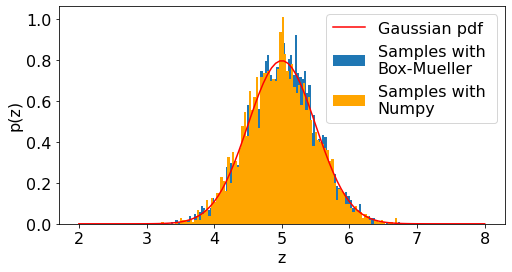

In [5]:
plt.figure(figsize=(8, 4))
plt.hist(z,density=True, bins=100, label='Samples with \nBox-Mueller');
plt.plot(z2,f, color='red', label='Gaussian pdf')
plt.hist(s,density=True, bins=100, color='orange', label='Samples with \nNumpy');
plt.xlabel('z')
plt.ylabel('p(z)')
plt.legend()
plt.show()